# <center>Задача уменьшения размерности. Метод главных компонент.</center>
## <center>Часть 1. Метод главных компонент (Principal Component Analysis).</center>

*   Предварительная обработка данных при очень большом количестве признаков -> "облегчение" моделей
*   Визуализация
*   Сжатие с потерями

Хотим уменьшить количество признаков, но не хотим просто выкинуть какие-то признаки.


Цель: преобразовать признаки в новые с сохранением **максимальной информативности**

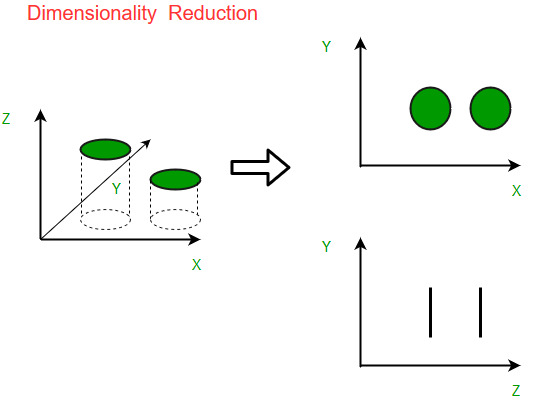




Идея: добавляем попарно ортогональные направления для конструирования пространства, на которое ортогонально спроектируем исходные данные — получаем новый набор данных

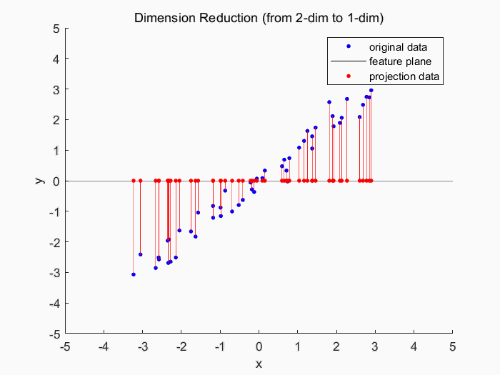

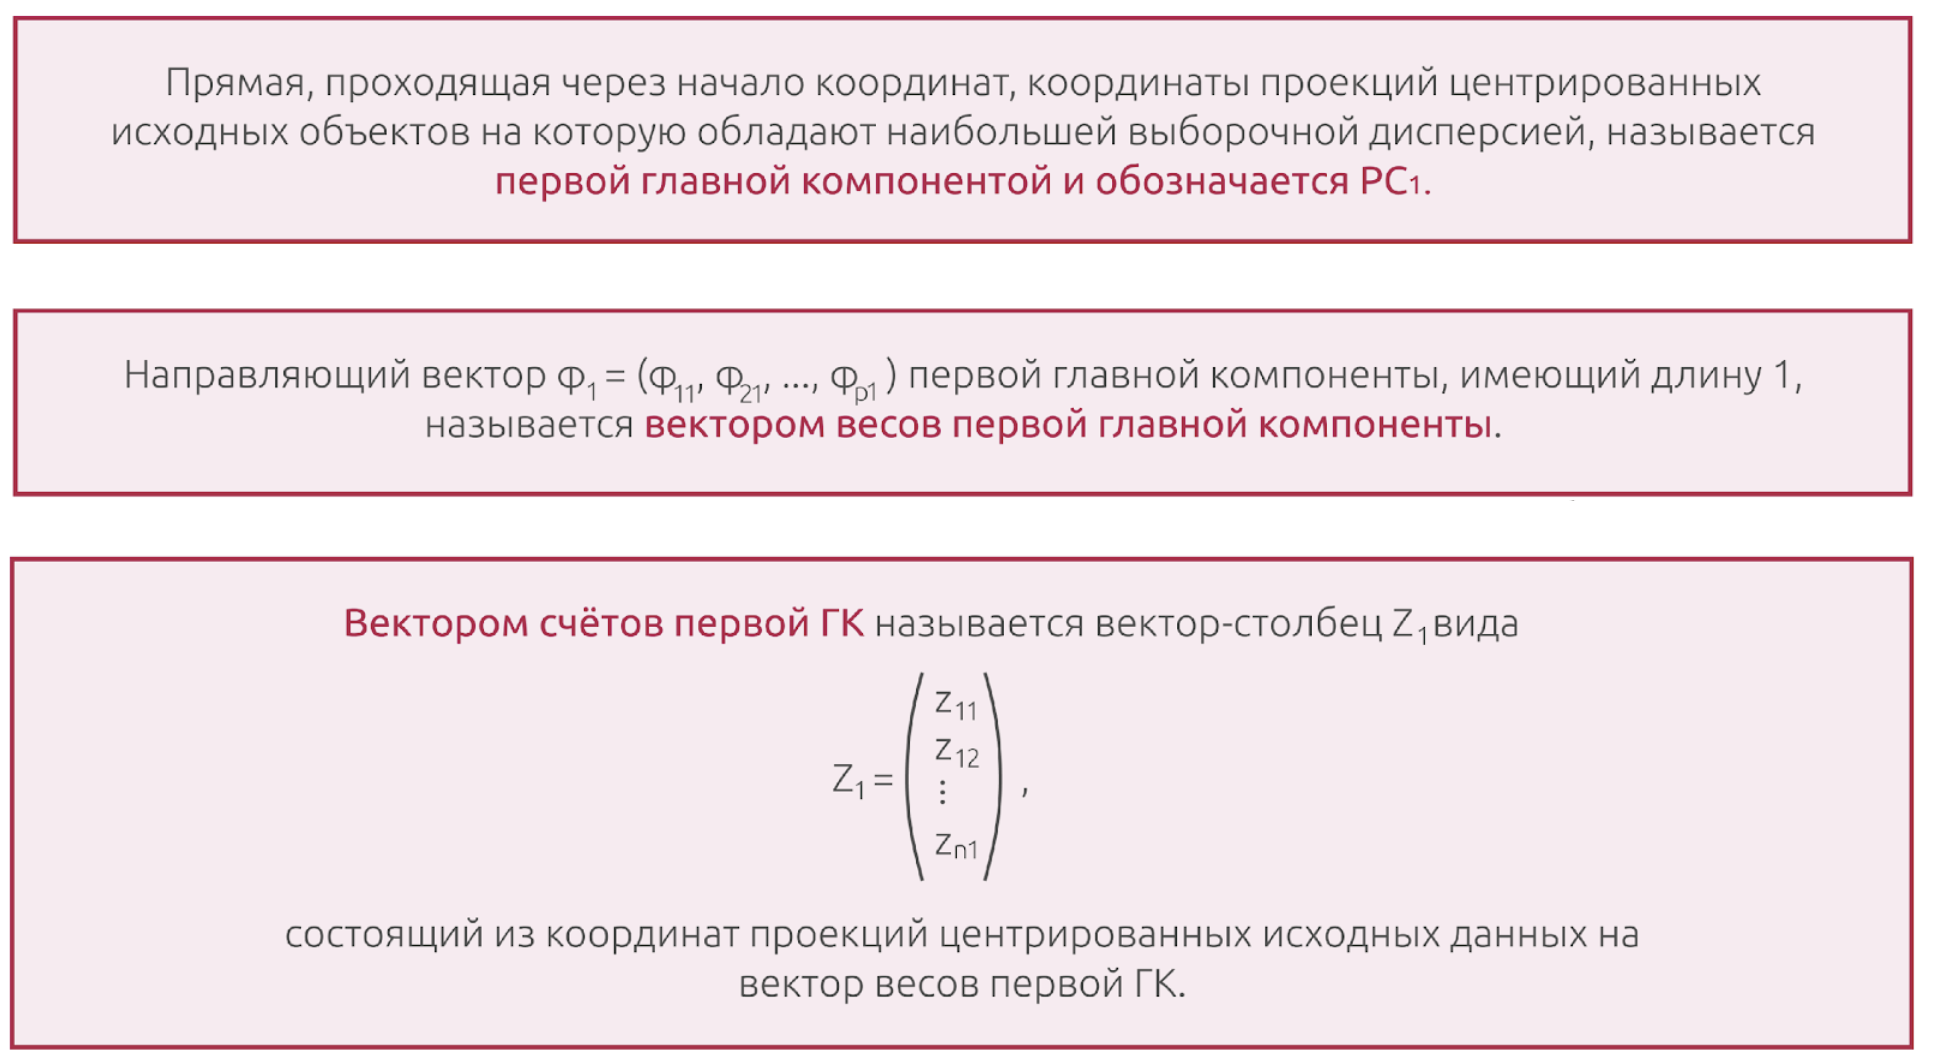

<img src="https://wiki.loginom.ru/images/pca.svg" width="1000px"/>

## <center>Часть 2. Примеры уменьшения размерности.</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline

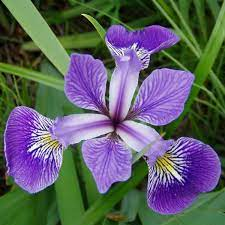

**Iris Dataset Attribute Information**:

Рассмотрим известный набор данных под названием Ирисы Фишера. Набор данных содержит 3 класса по 50 экземпляров в каждом, где каждый класс относится к типу ириса. Объекты описываются следующими признаками:

1.   Длина наружной доли околоцветника (англ. sepal length).
2.   Ширина наружной доли околоцветника (англ. sepal width).
3.   Длина внутренней доли околоцветника (англ. petal length).
4.   Ширина внутренней доли околоцветника (англ. petal width).

Прогнозируемый признак: класс ирисовых растений.

### Загрузка данных iris из sklearn

In [2]:
from sklearn import datasets

# загружаем готовый датасет из sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
pd.Series(y).unique()

array([0, 1, 2])

### Обучим модель на всех четырех признаках (4D пространство)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.8889


### Применим PCA и переведем данные в 2D

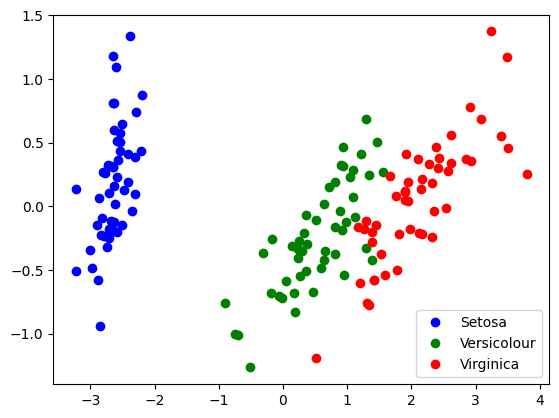

In [5]:
from sklearn.decomposition import PCA

# Выделим две главные компоненты
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Нарисуем разделение ирисов
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0);

### Обучим модель на 2D данных после PCA

In [6]:
# После PCA, данные в 2D
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.9111


### Посмотрим вклад каждой компоненты в дисперсию данных

In [7]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


### Загрузим данные большой размерности

По изображениям 8х8 надо распознать нарисованную цифру.

In [8]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
pd.Series(y).unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

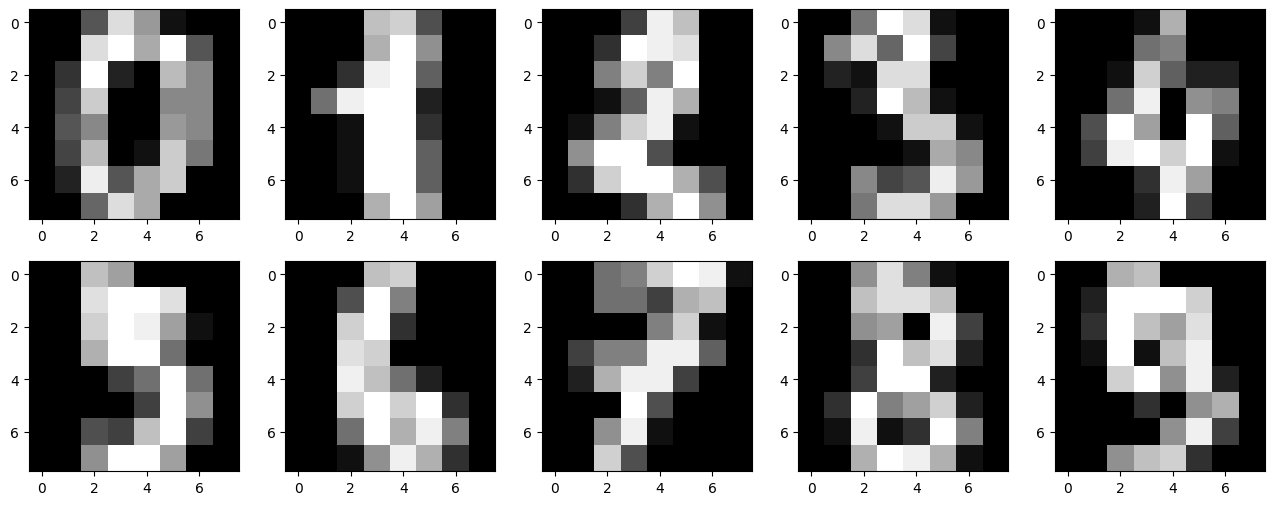

In [10]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

### Переведем из 64D в 2D

Projecting 64-dimensional data to 2D


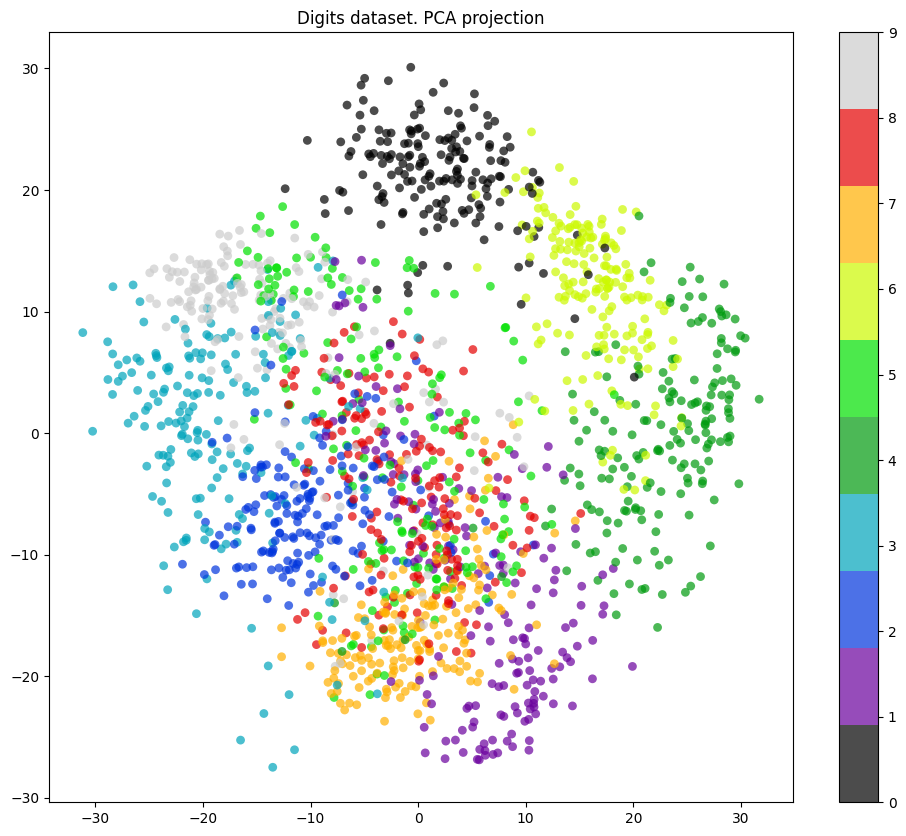

In [11]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Digits dataset. PCA projection');

По-прежнему можно разделить различные цифры, а размерность данных колосально снизилась.

### Зададим пороговое значение дисперсии для выбора количества компонент

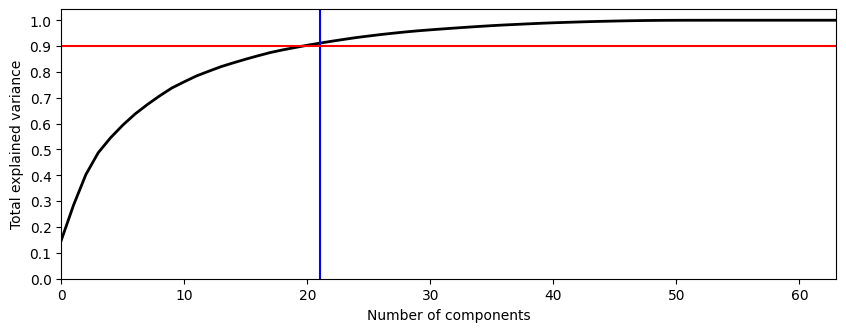

In [12]:
pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();

## t-SNE

Можно применить t-SNE и разделение на группы будет даже лучше, поскольку PCA имеет линейное ограничение, а t-SNE - нет.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 17.2 s, sys: 7.5 s, total: 24.6 s
Wall time: 3.59 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

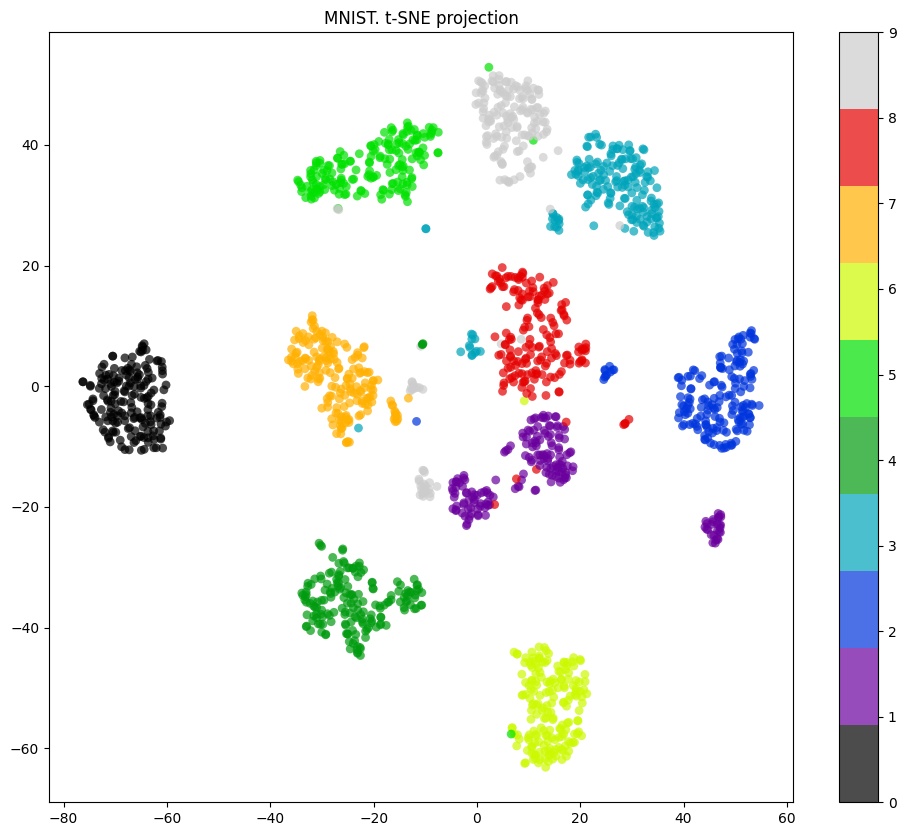

In [13]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("MNIST. t-SNE projection");

Однако даже при таком небольшом наборе данных алгоритм t-SNE занимает значительно больше времени, чем PCA.